<a href="https://colab.research.google.com/github/ravitata/conv_networks/blob/main/siamese_networks/build_image_pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

a = np.array([1,2,3,4,5,6,7,8,9,0])
#print(a)
np.where(a%2==0)[0]

array([1, 3, 5, 7, 9])

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [40]:
def make_pairs(images, labels):
  pair_images = []
  pair_labels = []

  num_classes = len(np.unique(labels))
  
  idx = [np.where(labels == i)[0] for i in range(0, num_classes)]
  #print(idx)
  
  for i in range(0, len(labels)):
    curr_img = images[i]
    curr_label = labels[i]

    pos_idx = np.random.choice(idx[curr_label])
    pos_img = images[pos_idx]
    
    pair_images.append([curr_img, pos_img])
    pair_labels.append(1)

    neg_idx = np.random.choice(np.where(labels != curr_label)[0])
    neg_img = images[neg_idx]

    pair_images.append([curr_img, neg_img])
    pair_labels.append(0)
  
  return np.array(pair_images), np.array(pair_labels)


In [41]:
pair_images, pair_labels = make_pairs(x_train, y_train)
print(pair_images.shape)
print(pair_labels.shape)

(120000, 2, 28, 28)
(120000,)


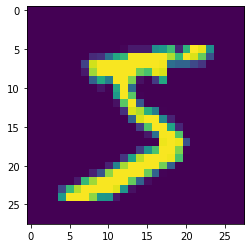

In [68]:
img_idx = 1
plt.imshow(pair_images[img_idx,0,:,:])

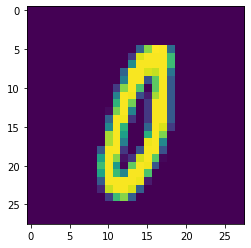

In [69]:
plt.imshow(pair_images[img_idx,1,:,:])

In [70]:
pair_labels[img_idx]

0

In [83]:
def show_pair_images(img_idx, pair_images, pair_labels):
  fig = plt.figure()
  #fig.title('Label = '+pair_labels[img_idx])
  plt.subplot(1,2,1)
  plt.imshow(pair_images[img_idx,0,:,:])
  plt.subplot(1,2,2)
  plt.imshow(pair_images[img_idx,1,:,:])
  plt.title('Label = '+pair_labels[img_idx].astype(str))

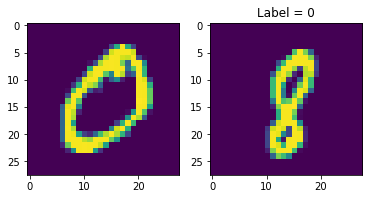

In [87]:
show_pair_images(3, pair_images, pair_labels)